# 📌 EdTech Course Optimization with Market Intelligence
## Objective
This notebook analyzes EdTech course data to provide insights for optimizing recorded lecture offerings. 

## Key Goals:
- Understand course distribution across categories.
- Analyze viewer engagement patterns.
- Identify trending skills and high-performing instructors.
- Optimize course duration for better retention.


# Importing the necessary libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Importing data set

In [15]:
df= pd.read_csv(r"C:\Users\vaibhav gupta\Downloads\edtech.csv")
df.head(2)

,Unnamed: 0,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,...,Course Short Intro,Weekly study,Premium course,What's include,Rank,Created by,Program,Number of ratings,Price,COURSE CATEGORIES
0,0,Machine Learning Specialization,https://www.coursera.org/specializations/machi...,#BreakIntoAI with Machine Learning Specializat...,Data Science,Machine Learning,Specialization,English,Subtitles: English,"Decision Trees, Artificial Neural Network, Log...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Introduction to Data Science Specialization,https://www.coursera.org/specializations/intro...,Launch your career in data science. Gain found...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Relational Database Management S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning & Preprocessing

In [29]:
#Renaming the first column
df.rename(columns={'Unnamed: 0': 'Course ID'}, inplace=True)

In [17]:
df.shape

(8092, 45)

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2812 entries, 0 to 2818
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course ID           2812 non-null   int64  
 1   Title               2812 non-null   object 
 2   URL                 2812 non-null   object 
 3   Short Intro         2769 non-null   object 
 4   Category            2812 non-null   object 
 5   Sub-Category        2812 non-null   object 
 6   Course Type         2812 non-null   object 
 7   Language            2812 non-null   object 
 8   Subtitle Languages  2795 non-null   object 
 9   Skills              1991 non-null   object 
 10  Instructors         2801 non-null   object 
 11  Rating              2688 non-null   float64
 12  Number of viewers   2688 non-null   object 
 13  Duration            2812 non-null   object 
 14  Site                2812 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 351.5+ KB


In [31]:
# Removing the unnecessary Column
columns_to_remove = [
    "Program Type", "Courses", "Level", "Number of Reviews", "Unique Projects", 
    "Prequisites", "What you learn", "Related Programs", "Monthly access", 
    "6-Month access", "4-Month access", "3-Month access", "5-Month access", 
    "2-Month access", "School", "Topics related to CRM", "ExpertTracks", "FAQs", 
    "Course Title", "Course URL", "Course Short Intro", "Weekly study", 
    "Premium course", "What's include", "Rank", "Created by", "Program", 
    "Number of ratings", "Price", "COURSE CATEGORIES"
]

df = df.drop(columns=columns_to_remove, errors="ignore")

In [32]:
# Since category-wise emphasis is paramount.
#it is essential to ensure that the "Category" column contains no null values.
df = df.dropna(subset=['Category'])

In [33]:
df.shape

(2812, 15)

In [34]:
# Convert 'Rating' column to float by removing 'star' suffix
df['Rating'] = df['Rating'].astype(str).str.replace('stars', '').astype(float)
df['Rating']

0       4.9
1       4.7
2       4.6
3       4.7
4       4.9
       ... 
2814    4.8
2815    4.7
2816    4.6
2817    4.7
2818    4.7
Name: Rating, Length: 2812, dtype: float64

In [35]:
category_counts = df['Category'].value_counts()
print(category_counts)


Category
Business                            895
Computer Science                    455
Data Science                        448
Health                              264
Information Technology              221
Physical Science and Engineering    150
Arts and Humanities                 120
Language Learning                    86
Social Sciences                      83
Personal Development                 68
Math and Logic                       22
Name: count, dtype: int64


In [36]:
# Filter out categories that have only 1 occurrence
df = df[df['Category'].isin(category_counts[category_counts > 1].index)]

In [44]:
# Display the updated DataFrame
df

,Course ID,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,Instructors,Rating,Number of viewers,Duration,Site
0,0,Machine Learning Specialization,https://www.coursera.org/specializations/machi...,#BreakIntoAI with Machine Learning Specializat...,Data Science,Machine Learning,Specialization,English,Subtitles: English,"Decision Trees, Artificial Neural Network, Log...","Andrew Ng ,Eddy Shyu ,Aarti Bagul ,Geoff Ladwig ,",4.9,"10,438",Approximately 3 months to complete,Coursera
1,1,Introduction to Data Science Specialization,https://www.coursera.org/specializations/intro...,Launch your career in data science. Gain found...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Relational Database Management S...","Rav Ahuja ,Alex Aklson ,Aije Egwaikhide ,Svetl...",4.7,"11,927",Approximately 5 months to complete,Coursera
2,2,Data Science Fundamentals with Python and SQL ...,https://www.coursera.org/specializations/data-...,Build the Foundation for your Data Science car...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Github, Python Programming, Jupy...","Aije Egwaikhide ,Svetlana Levitan ,Romeo Kienz...",4.6,"2,295",Approximately 7 months to complete,Coursera
3,3,Key Technologies for Business Specialization,https://www.coursera.org/specializations/key-t...,Get Ahead with Key Business Technologies. Gain...,Business,Business Essentials,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Artificial Intelligence (AI), Bu...","Rav Ahuja ,Alex Aklson ,",4.7,"1,232",Approximately 3 months to complete,Coursera
4,4,Deep Learning Specialization,https://www.coursera.org/specializations/deep-...,Become a Machine Learning expert. Master the f...,Data Science,Machine Learning,Specialization,English,"Subtitles: English, Chinese (Traditional), Ara...","Artificial Neural Network, Convolutional Neura...","Andrew Ng ,Kian Katanforoosh ,Younes Bensouda ...",4.9,"1,29,253",Approximately 5 months to complete,Coursera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2814,Chinese for HSK 3 PART II,https://www.coursera.org/learn/hsk-3-part2?spe...,"大家好！Hi, everyone, welcome to join our Chinese ...",Language Learning,Other Languages,Course,English,"Subtitles: English, Chinese (Simplified)",NaN,LU Yun,4.8,241,Approx. 27 hours to complete,Coursera
2815,2815,JavaScript Basics,https://www.coursera.org/learn/javascript-basi...,This course introduces the programming languag...,Computer Science,Mobile and Web Development,Course,English,Subtitles: English,NaN,William Mead,4.7,723,Approx. 20 hours to complete,Coursera
2816,2816,Think Again I: How to Understand Arguments,https://www.coursera.org/learn/understanding-a...,"In this course, you will learn what an argumen...",Arts and Humanities,Philosophy,Course,English,"Subtitles: Arabic, French, Ukrainian, Portugue...","Evaluation,Interpretation,Language,Linguistics,",Dr. Walter Sinnott-Armstrong,4.6,"2,810",Approx. 25 hours to complete,Coursera
2817,2817,Iniciación y Planificación de Proyectos,https://www.coursera.org/learn/planificacion-p...,"En este curso, aprenderás los principios funda...",Business,Leadership and Management,Course,Spanish,Subtitles: Spanish,"Project Management,Leadership,Planning,Project...",Dr. Filiberto González Hernández,4.7,"4,261",Approx. 5 hours to complete,Coursera


# 🔍 Exploratory Data Analysis (EDA)
- Visualizing course distribution by category and subcategory
 - Analyzing views per category
- Checking top instructors
 - Studying the impact of subtitles on engagement


# Business & Data Analysis Goals

# Goal 1: Analyzing Course Distribution Across Categories

Examine the distribution of course types across categories to uncover trends and insights, enabling the client to strategically determine which course types to launch in specific categories for maximum impact and alignment with learner demand, also count the number of courses by category and sub-category.

In [49]:
categories= df['Category'].unique()

C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_30948\3065500572.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  rows = np.math.ceil(len(categories) / cols)
C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_30948\3065500572.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subset.index, y=subset.values, ax=axes[i], palette='viridis')
C:\Users\vaibhav gupta\AppData\Local\Temp\ipykernel_30948\3065500572.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subset.index, y=subset.values, ax=axes[i], palette='viridis')
C:\Users\vaibhav gupta\AppData\Local\Temp\ipykern

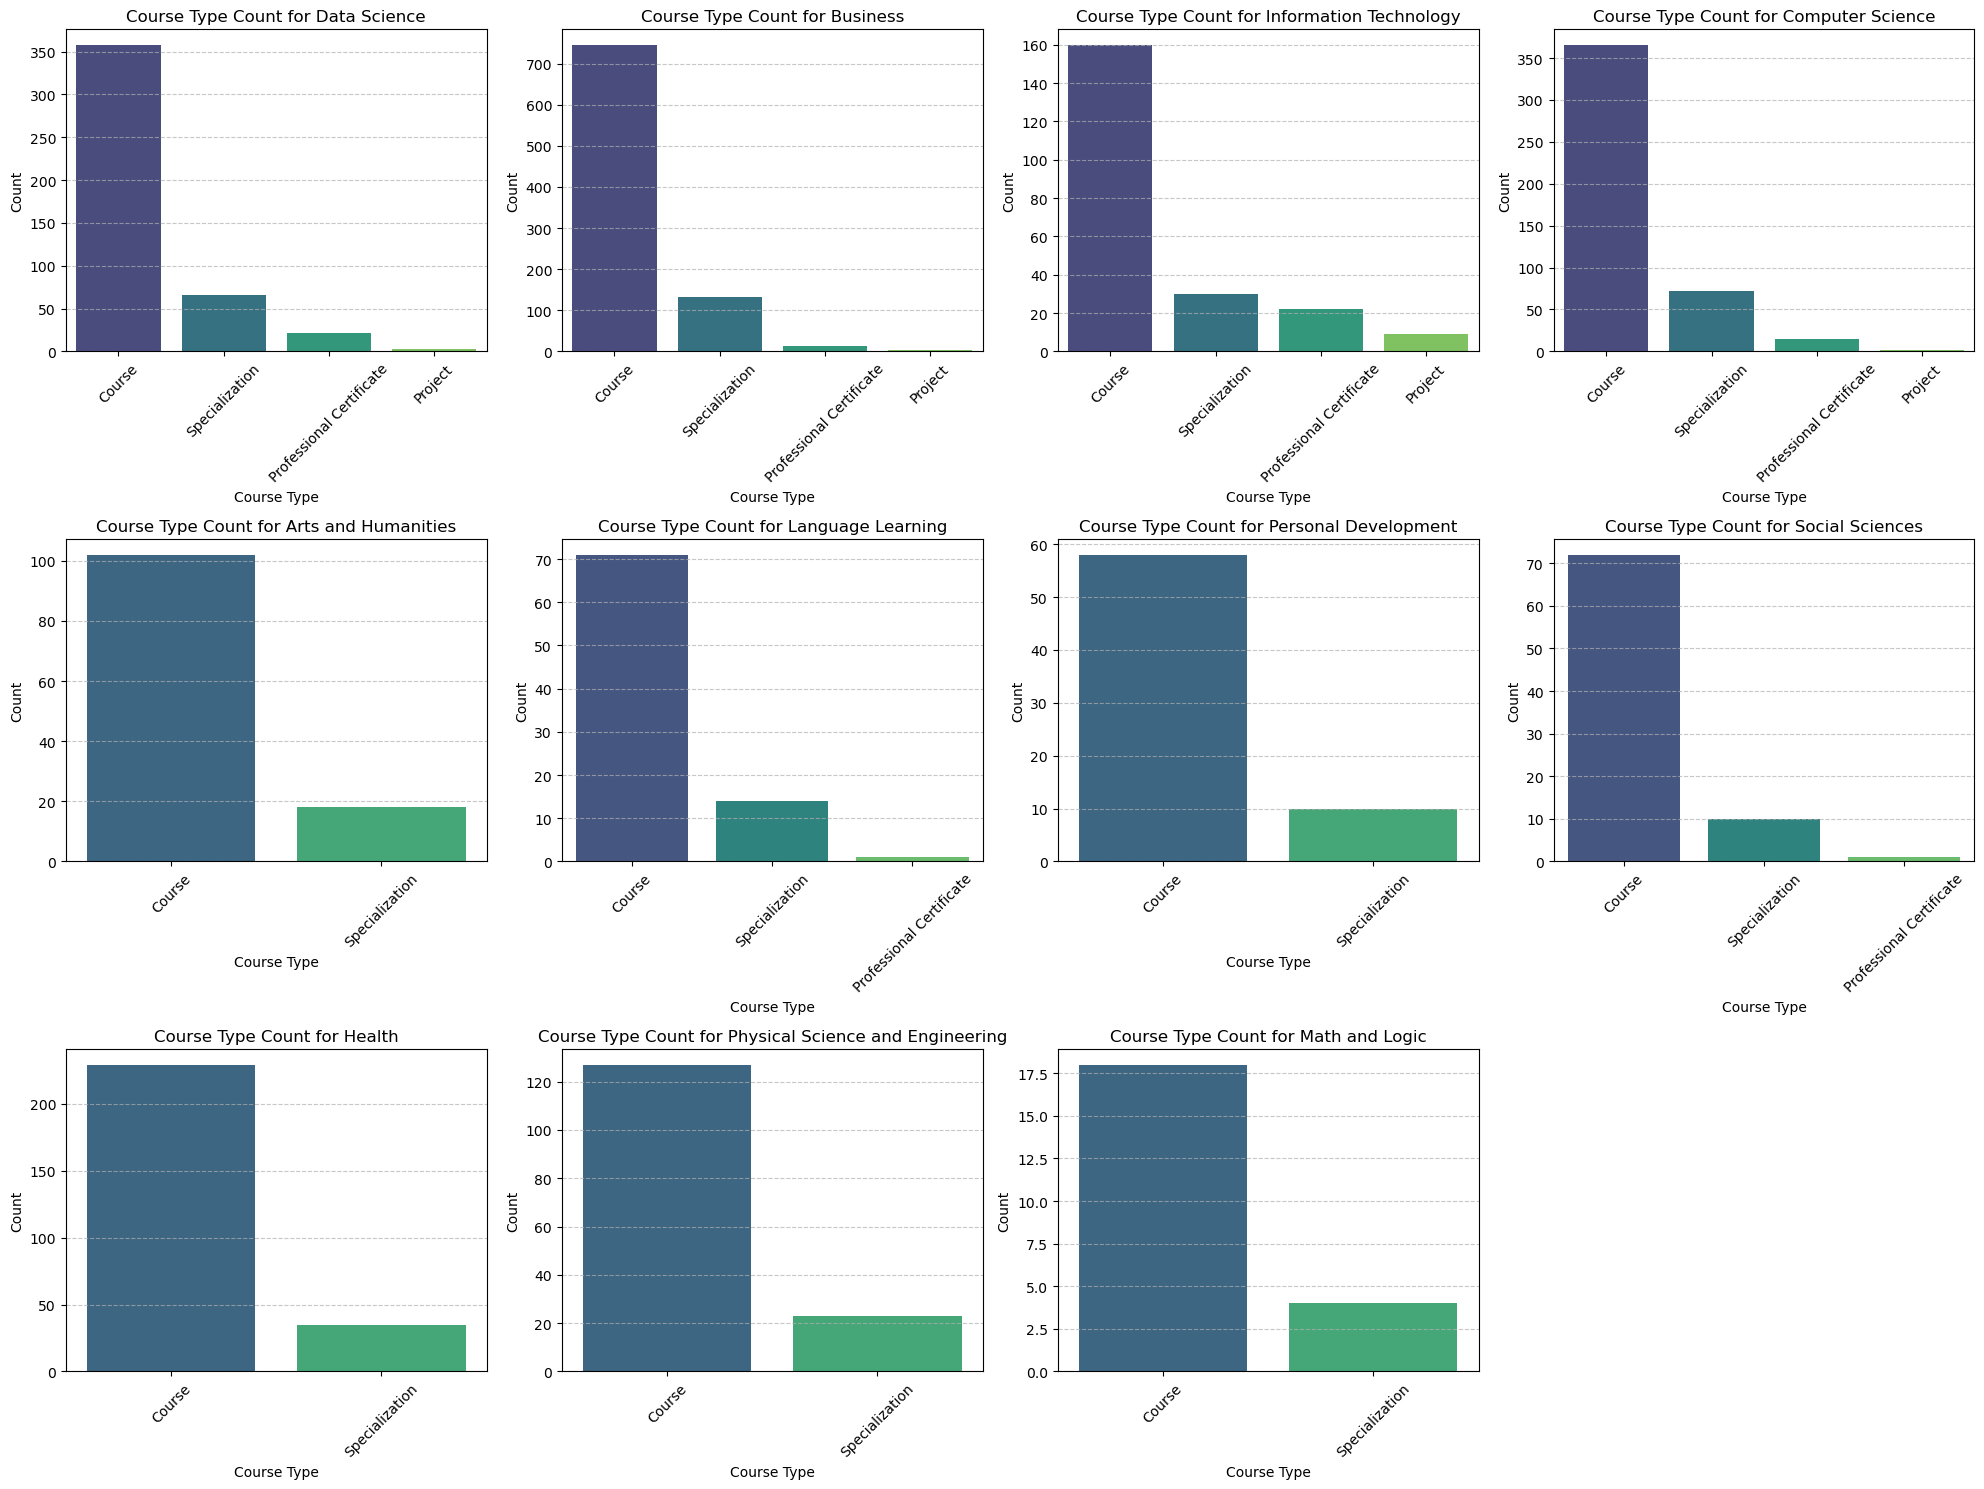

In [50]:
# Define the number of columns per row
cols = 4 
rows = np.math.ceil(len(categories) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjusted figsize for better visibility
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot bar graphs for each category
for i, category in enumerate(categories):
    subset = df[df['Category'] == category]['Course Type'].value_counts()
    
    sns.barplot(x=subset.index, y=subset.values, ax=axes[i], palette='viridis')
    
    axes[i].set_title(f'Course Type Count for {category}')
    axes[i].set_xlabel('Course Type')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Goal 2: Identifying In-Demand Skills by Category


Identify the most commonly taught skills in today's educational landscape based on the data given based on category to ensure course offerings remain relevant and aligned with current job market demands.

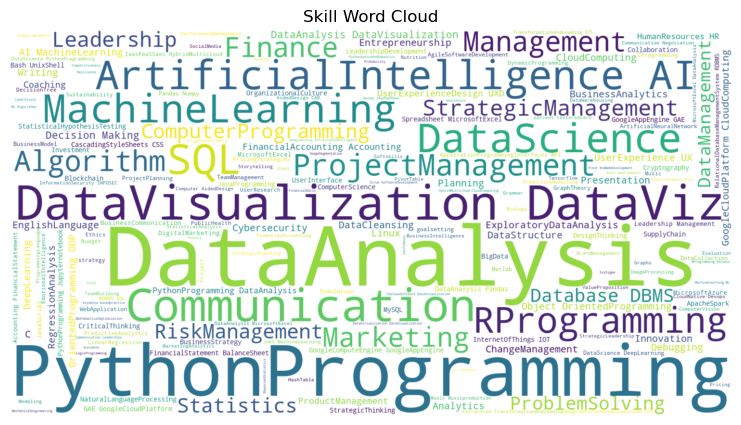

In [52]:
# Convert column names to remove extra spaces
df.columns = df.columns.str.strip()

# Remove spaces within words in the 'Skill' column
df['Skills'] = df['Skills'].str.replace(' ', '', regex=True)

# Combine all skills into a single text string
text = " ".join(df['Skills'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=1500, height=800, background_color='white', colormap='viridis').generate(text)

# Display the Word Cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Skill Word Cloud")
plt.show()


# Goal 3: Examining Language Distribution in Courses

To know the distribution of various Languages  in which a particular course is  created


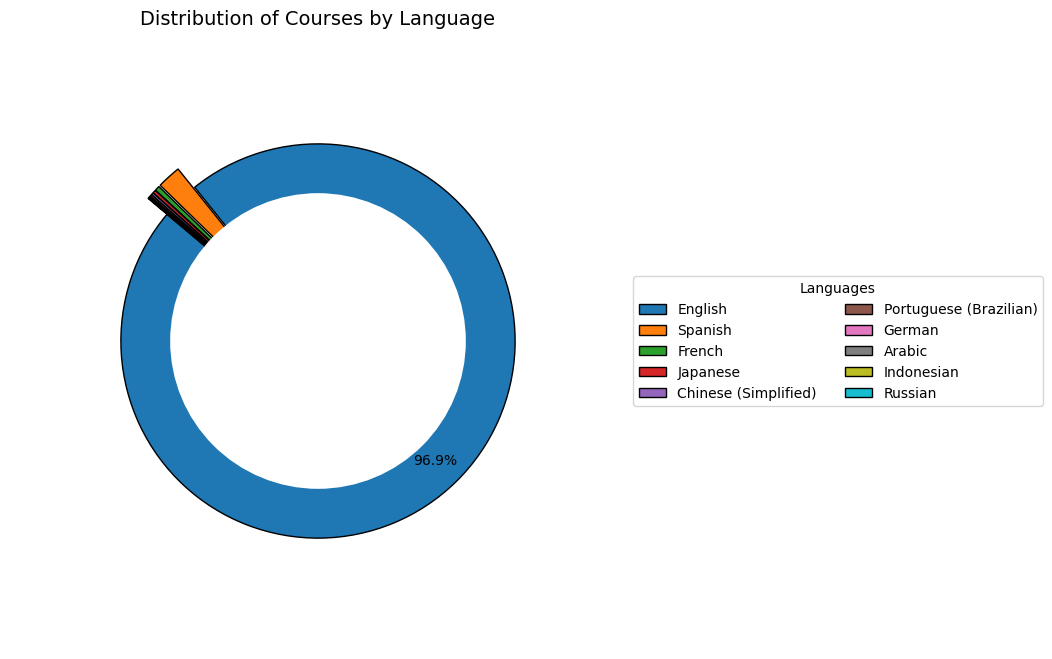

In [53]:
# Count the number of courses per language
language_counts = df['Language'].value_counts()

# Define explode values: Only explode small slices (less than 5% of total)
explode = [0.1 if (count / language_counts.sum()) < 0.05 else 0 for count in language_counts]

# Generate a distinct color palette (e.g., "Set2" for better contrast)
colors = sns.color_palette("tab10", len(language_counts))

# Create the pie chart as a donut chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    language_counts, 
    labels=None,  # Hide labels from slices
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # Hide very small labels
    explode=explode, 
    colors=colors,  # Use the generated distinct color palette
    startangle=140, 
    pctdistance=0.85, 
    wedgeprops={'edgecolor': 'black'},  # Add edges for clarity
    radius=0.8  # Donut effect
)

# Draw a white circle at the center to create a donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='white'))

# Add a legend with multiple columns
plt.legend(wedges, language_counts.index, title="Languages", loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)

# Add title
plt.title("Distribution of Courses by Language", fontsize=14)

# Display the chart
plt.show()



# Goal 4: Investigating the Impact of Subtitles on Engagement

Investigate the relationship between the availability of subtitles and the number of views for courses to determine how subtitle options may impact viewer engagement and accessibility.


In [54]:
# Keep only rows where 'Subtitle Languages' starts with 'Subtitles'
df = df[df['Subtitle Languages'].astype(str).str.startswith('Subtitles')]
# Reset index after filtering
df = df.reset_index(drop=True)

In [55]:
df['Subtitle Languages']

0                                      Subtitles: English
1       Subtitles: English, Arabic, French, Portuguese...
2       Subtitles: English, Arabic, French, Portuguese...
3       Subtitles: English, Arabic, French, Portuguese...
4       Subtitles: English, Chinese (Traditional), Ara...
                              ...                        
2758             Subtitles: English, Chinese (Simplified)
2759                                   Subtitles: English
2760    Subtitles: Arabic, French, Ukrainian, Portugue...
2761                                   Subtitles: Spanish
2762    Subtitles: Arabic, French, Portuguese (Europea...
Name: Subtitle Languages, Length: 2763, dtype: object

In [56]:
# Remove 'Subtitles: ' from the 'Subtitle Languages' column
df['Subtitle Languages'] = df['Subtitle Languages'].str.replace('Subtitles: ', '', regex=True)

In [57]:
df['Subtitle Languages']

0                                                 English
1       English, Arabic, French, Portuguese (European)...
2       English, Arabic, French, Portuguese (European)...
3       English, Arabic, French, Portuguese (European)...
4       English, Chinese (Traditional), Arabic, French...
                              ...                        
2758                        English, Chinese (Simplified)
2759                                              English
2760    Arabic, French, Ukrainian, Portuguese (Europea...
2761                                              Spanish
2762    Arabic, French, Portuguese (European), Italian...
Name: Subtitle Languages, Length: 2763, dtype: object

In [58]:
# Count the number of languages in each row
df['Subtitle Language Count'] = df['Subtitle Languages'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

In [59]:
df['Subtitle Language Count']

0        1
1       11
2       11
3       10
4       16
        ..
2758     2
2759     1
2760    13
2761     1
2762     9
Name: Subtitle Language Count, Length: 2763, dtype: int64

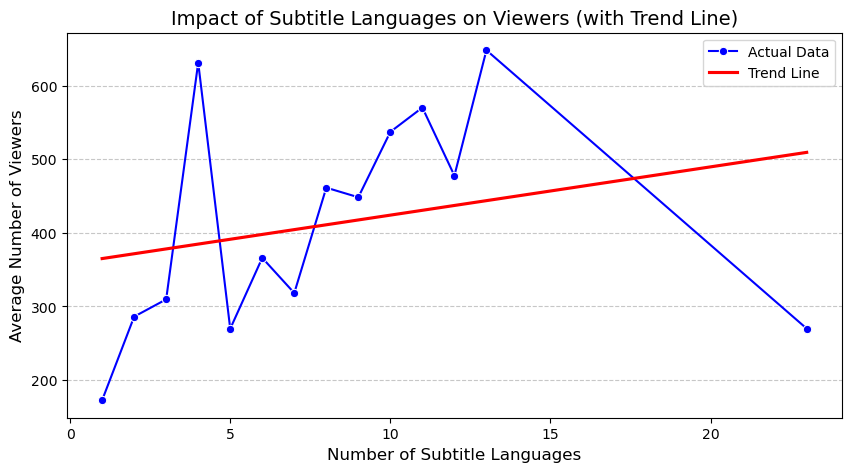

In [60]:
# Convert columns to numeric (handles errors)
df['Subtitle Language Count'] = pd.to_numeric(df['Subtitle Language Count'], errors='coerce')
df['Number of viewers'] = pd.to_numeric(df['Number of viewers'], errors='coerce')

# Drop NaN values (if any)
df = df.dropna(subset=['Subtitle Language Count', 'Number of viewers'])

# Group data by 'Subtitle Language Count' and calculate average viewers
subtitle_vs_views = df.groupby('Subtitle Language Count', as_index=False)['Number of viewers'].mean()

# Plot setup
plt.figure(figsize=(10, 5))

# Line plot for actual data points
sns.lineplot(data=subtitle_vs_views, x='Subtitle Language Count', y='Number of viewers', 
             marker='o', linestyle='-', label='Actual Data', color='blue')

# Trend line using regression
sns.regplot(data=subtitle_vs_views, x='Subtitle Language Count', y='Number of viewers', 
            scatter=False, color='red', ci=None, label='Trend Line')

# Customize plot appearance
plt.title('Impact of Subtitle Languages on Viewers (with Trend Line)', fontsize=14)
plt.xlabel('Number of Subtitle Languages', fontsize=12)
plt.ylabel('Average Number of Viewers', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Goal 5: Investigating the Impact of Subtitles on Engagement

Identify the top three instructors for each category and subcategory based on ratings   to highlight educators who consistently deliver high-quality content and effectively engage learners so that they can be approached by your client to make content for them and make this visual as static.



In [61]:
df1 = df[['Course ID', 'Category', 'Sub-Category', 'Instructors', 'Rating']]
df1

,Course ID,Category,Sub-Category,Instructors,Rating
5,5,Data Science,Machine Learning,"Rav Ahuja ,Jared Harris ,Michael Lenox ,Rajkum...",4.8
9,9,Information Technology,Data Management,"Rav Ahuja ,Priya Kapoor ,Joseph Santarcangelo ...",4.7
11,11,Computer Science,Software Development,"Rav Ahuja ,Lin Joyner ,Bethany Hudnutt ,Sam Pr...",4.7
12,12,Computer Science,Design and Product,"John Rofrano ,Rav Ahuja ,",4.8
13,13,Information Technology,Cloud Computing,"Rav Ahuja ,Upkar Lidder ,Michelle Saltoun ,Sac...",4.5
...,...,...,...,...,...
2754,2810,Information Technology,Security,(ISC)² Education & Training,4.7
2755,2811,Computer Science,Algorithms,Luis Serrano,4.8
2757,2813,Health,Healthcare Management,Theodore Ruger,4.9
2758,2814,Language Learning,Other Languages,LU Yun,4.8


In [62]:
df_exploded = df.assign(Instructor=df['Instructors'].str.split(',')).explode('Instructor')
# Remove leading/trailing spaces from the new 'Instructor' column
df_exploded['Instructor'] = df_exploded['Instructor'].str.strip()
df_exploded['Instructor']

5                         Rav Ahuja
5                      Jared Harris
5                     Michael Lenox
5               Rajkumar Venkatesan
5             Yael Grushka-Cockayne
                   ...             
2754    (ISC)² Education & Training
2755                   Luis Serrano
2757                 Theodore Ruger
2758                         LU Yun
2759                   William Mead
Name: Instructor, Length: 2368, dtype: object

In [63]:
df_exploded.drop(columns=['Instructors'], inplace=True)

# Reset index
df_exploded.reset_index(drop=True, inplace=True)

# Display the transformed DataFrame
df_exploded.head()

,Course ID,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,Rating,Number of viewers,Duration,Site,Subtitle Language Count,Instructor
0,5,IBM & Darden Digital Strategy Specialization,https://www.coursera.org/specializations/digit...,Get ahead with key business and technical skil...,Data Science,Machine Learning,Specialization,English,"English, Arabic, French, Portuguese (European)...","DataScience,Digitaltransformation,ArtificialIn...",4.8,262.0,Approximately 7 months to complete,Coursera,9,Rav Ahuja
1,5,IBM & Darden Digital Strategy Specialization,https://www.coursera.org/specializations/digit...,Get ahead with key business and technical skil...,Data Science,Machine Learning,Specialization,English,"English, Arabic, French, Portuguese (European)...","DataScience,Digitaltransformation,ArtificialIn...",4.8,262.0,Approximately 7 months to complete,Coursera,9,Jared Harris
2,5,IBM & Darden Digital Strategy Specialization,https://www.coursera.org/specializations/digit...,Get ahead with key business and technical skil...,Data Science,Machine Learning,Specialization,English,"English, Arabic, French, Portuguese (European)...","DataScience,Digitaltransformation,ArtificialIn...",4.8,262.0,Approximately 7 months to complete,Coursera,9,Michael Lenox
3,5,IBM & Darden Digital Strategy Specialization,https://www.coursera.org/specializations/digit...,Get ahead with key business and technical skil...,Data Science,Machine Learning,Specialization,English,"English, Arabic, French, Portuguese (European)...","DataScience,Digitaltransformation,ArtificialIn...",4.8,262.0,Approximately 7 months to complete,Coursera,9,Rajkumar Venkatesan
4,5,IBM & Darden Digital Strategy Specialization,https://www.coursera.org/specializations/digit...,Get ahead with key business and technical skil...,Data Science,Machine Learning,Specialization,English,"English, Arabic, French, Portuguese (European)...","DataScience,Digitaltransformation,ArtificialIn...",4.8,262.0,Approximately 7 months to complete,Coursera,9,Yael Grushka-Cockayne


In [64]:
# Convert 'Rating' to numeric (if not already)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Category', 'Sub-Category', and 'Instructor' to calculate the average rating
instructor_ratings = df.groupby(['Category', 'Sub-Category', 'Instructors'])['Rating'].mean().reset_index()

# Rank instructors based on rating within each Category & Sub-Category
instructor_ratings['Rank'] = instructor_ratings.groupby(['Category', 'Sub-Category'])['Rating'].rank(ascending=False, method='dense')

# Filter only the top  instructor for each Category & Sub-Category
top_instructors = instructor_ratings[instructor_ratings['Rank'] <= 1].sort_values(by=['Category', 'Sub-Category', 'Rank'])

# Drop the rank column for cleaner visualization
top_instructors.drop(columns=['Rank'], inplace=True)

# Display as a formatted table
top_instructors


,Category,Sub-Category,Instructors,Rating
0,Arts and Humanities,History,Eliseo (Cheo) Torres,4.70
12,Arts and Humanities,Music and Art,"George W. Russell, Jr.",4.90
17,Arts and Humanities,Music and Art,"John P. Kellogg, Esq. ,Stephen Webber ,Dr. E. ...",4.90
33,Arts and Humanities,Music and Art,Scarlet Keys,4.90
40,Arts and Humanities,Philosophy,Dr. Walter Sinnott-Armstrong,4.60
...,...,...,...,...
862,Physical Science and Engineering,Research Methods,"Nicholas James Provart ,",4.80
868,Social Sciences,Economics,Robert Shiller,4.80
872,Social Sciences,Education,"Barbara Oakley ,Beth Rogowsky ,Dr. Terrence Se...",5.00
885,Social Sciences,Governance and Society,Claudia Useche,4.90


# Goal 6: Understanding Course Duration vs. Viewership

Examine the relationship between course duration and the number of views to understand how the length of a course may influence viewer engagement and preferences for each category and sub-category, if course duration has a month (in each month only 60 hours of content ) and for flexible schedules make the timing as 200 hours.


In [65]:
df['Duration'].unique()

array(['Approximately 7 months to complete',
       'Approximately 5 months to complete',
       'Approximately 4 months to complete',
       'Approximately 6 months to complete',
       'Approximately 8 months to complete',
       'Approximately 3 months to complete',
       'Approximately 9 months to complete',
       'Approximately 12 months to complete',
       'Approximately 2 months to complete',
       'Approximately 10 months to complete',
       'Approximately 1 month to complete', 'Approx. 3 hours to complete',
       'Approx. 10 hours to complete', 'Approx. 13 hours to complete',
       'Approx. 48 hours to complete', 'Approx. 12 hours to complete',
       'Approx. 9 hours to complete', 'Approx. 11 hours to complete',
       'Approx. 40 hours to complete', 'Approx. 7 hours to complete',
       'Approx. 14 hours to complete', 'Approx. 2 hours to complete',
       'Approx. 21 hours to complete', 'Approx. 8 hours to complete',
       'Approx. 5 hours to complete', 'Approx. 20 h

In [66]:
import pandas as pd
import re

# Function to clean the 'Duration' column
def clean_duration(text):
    text = re.sub(r'Approx\.|Approximately', '', text).strip()  # Remove "Approx." and "Approximately"
    text = re.sub(r'\b1 month\b', '1 months', text)  # Only replace singular "month"
    text = re.sub(r'\b1 hour\b', '1 hours', text)  # Only replace singular "hour"
    return text

# Apply the function to the column
df['Duration'] = df['Duration'].apply(clean_duration)
df[ 'Duration']

5       7 months to complete
9       5 months to complete
11      5 months to complete
12      4 months to complete
13      6 months to complete
                ...         
2754     2 hours to complete
2755    25 hours to complete
2757     9 hours to complete
2758    27 hours to complete
2759    20 hours to complete
Name: Duration, Length: 1523, dtype: object

In [67]:
# Function to convert duration to numeric values
def convert_duration(text):
    text = text.lower()  # Convert to lowercase for case insensitivity

    # Extract the first number from the text
    match = re.search(r'\d+', text)
    if match:
        number = int(match.group())  # Extract the number
    else:
        return 200  # Default value for missing numbers

    # Check the unit and apply conversion
    if "month" in text:
        return number * 60  # Convert months to hours (assuming 1 month = 60 hours)
    elif "hour" in text:
        return number  # Hours remain the same
    elif "minute" in text:
        return number / 60  # Convert minutes to hours
    else:
        return 200  # Default value if no match is found

# Apply the function to create a new column
df['Duration_in_Hours'] = df['Duration'].apply(convert_duration)

df['Duration_in_Hours']

5       420
9       300
11      300
12      240
13      360
       ... 
2754      2
2755     25
2757      9
2758     27
2759     20
Name: Duration_in_Hours, Length: 1523, dtype: int64

In [68]:
df['Number of viewers']

5       262.0
9       922.0
11      201.0
12      625.0
13      342.0
        ...  
2754     16.0
2755    110.0
2757    196.0
2758    241.0
2759    723.0
Name: Number of viewers, Length: 1523, dtype: float64

In [69]:
# **Fix: Extract only numeric values and remove commas**
df['Number of viewers'] = df['Number of viewers'].astype(str)  # Convert to string if not already
df['Number of viewers'] = df['Number of viewers'].apply(lambda x: re.sub(r'\D', '', x))  # Remove non-numeric characters
df['Number of viewers'] = df['Number of viewers'].replace('', '0').astype(int)  # Convert to int, replacing empty strings with 0


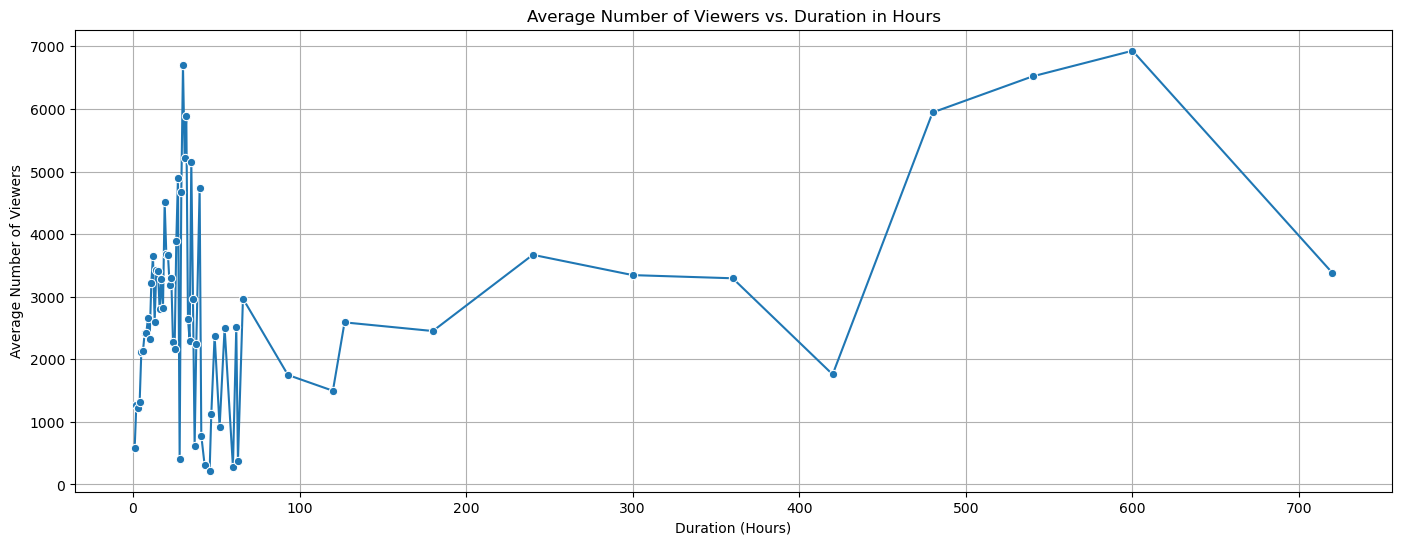

In [71]:
# Remove NaN values
df = df.dropna()

# Group by `Duration_in_Hours` and calculate average `Number of viewers`
df_avg = df.groupby('Duration_in_Hours', as_index=False)['Number of viewers'].mean()

# Sort by `Duration_in_Hours`
df_avg = df_avg.sort_values(by='Duration_in_Hours')

# Plot the line chart
plt.figure(figsize=(17, 6))
sns.lineplot(data=df_avg, x='Duration_in_Hours', y='Number of viewers', marker='o', linestyle='-')

# Labels and title
plt.xlabel("Duration (Hours)")
plt.ylabel("Average Number of Viewers")
plt.title("Average Number of Viewers vs. Duration in Hours")
plt.grid(True)

# Show the plot
plt.show()

# Goal 7: Evaluating Skill Variety’s Impact on Viewership

In the context of recorded lectures, we need to investigate whether the variety of skills offered within each category and subcategory has a measurable impact on viewership






In [72]:
# **Count number of skills**
df['Count of Skills Provided'] = df['Skills'].apply(lambda x: len(x.split(',')) if x else 0)-1

In [73]:
df['Count of Skills Provided'] 

5       12
9       13
11      12
13      12
15      12
        ..
2752     3
2753     5
2754     3
2755     5
2757     4
Name: Count of Skills Provided, Length: 903, dtype: int64

In [81]:
# **Group by 'Category' & 'Sub-Category' and compute averages**
df_grouped = df.groupby(['Category', 'Sub-Category']).agg(
    Avg_Skill_Count=('Count of Skills Provided', lambda x: int(np.round(np.mean(x)))),  # Round and convert to int
    Avg_Duration_Hours=('Duration_in_Hours', 'mean'),  # Keep in float format
    Avg_Views=('Number of viewers', lambda x: int(np.round(np.mean(x))))  # Corrected extra parenthesis
).reset_index()

# Display the DataFrame
df_grouped


,Category,Sub-Category,Avg_Skill_Count,Avg_Duration_Hours,Avg_Views
0,Arts and Humanities,Music and Art,6,73.692308,4153
1,Arts and Humanities,Philosophy,7,240.000000,4850
2,Business,Business Essentials,5,75.437500,3923
3,Business,Business Strategy,5,39.526316,3315
4,Business,Entrepreneurship,4,134.000000,4398
5,Business,Finance,5,54.448276,2825
6,Business,Leadership and Management,5,80.387097,2601
7,Business,Marketing,5,48.650000,3747
8,Computer Science,Algorithms,5,59.454545,2467
9,Computer Science,Computer Security and Networks,5,82.750000,3034
